<a href="https://colab.research.google.com/github/harimerla/Geneterrian-Texture/blob/main/geneterrian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('Layout.txt', sep='\t', header=None)
df.columns = ['gene','x','y','d']
df.head()

,gene,x,y,d
0,CTSB,0.675150,0.623729,1
1,HIGD1A,0.239162,0.558145,1
2,EIF1,0.232695,0.511298,1
3,RPL37,0.280120,0.454532,1
4,RPS3A,0.398144,0.479884,1


In [8]:
dfw = pd.read_csv('Expression.txt', sep='\t', header=None)
dfw.columns = ['gene','weight']
dfw.head()

,gene,weight
0,ITGAV,0.283335
1,TCEA1,-0.258570
2,DPYSL2,-0.103902
3,IGFBP7,0.330011
4,GJA1,-0.074735


In [9]:
df = pd.merge(df,dfw,on='gene',how='inner')
df.head()

,gene,x,y,d,weight
0,CTSB,0.675150,0.623729,1,0.776956
1,HIGD1A,0.239162,0.558145,1,-0.214144
2,EIF1,0.232695,0.511298,1,-0.082716
3,RPL37,0.280120,0.454532,1,0.181571
4,RPS3A,0.398144,0.479884,1,-0.204736


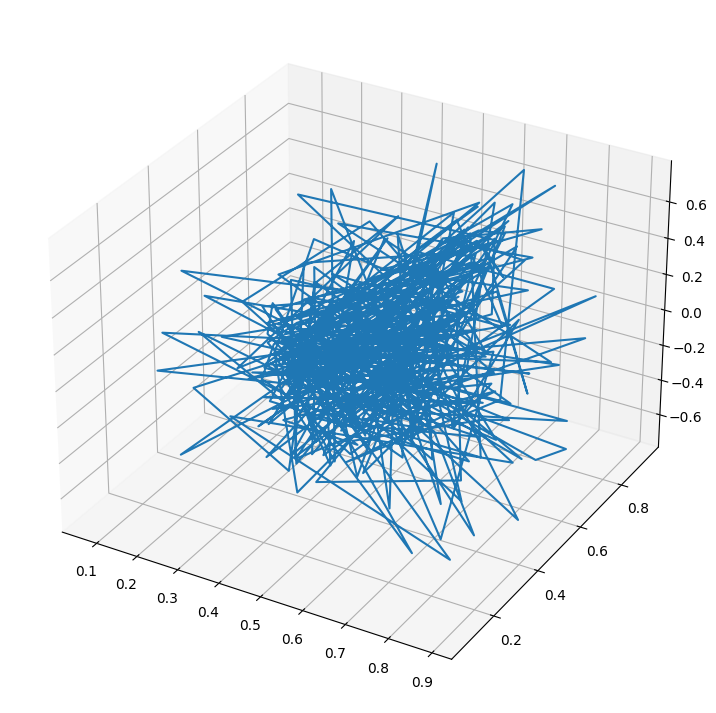

In [10]:
fig = plt.figure(figsize = (16, 9))
#ax = plt.axes(projection ="3d")
ax = fig.add_subplot(111, projection='3d')

ax.plot(df['x'], df['y'], df['weight'])

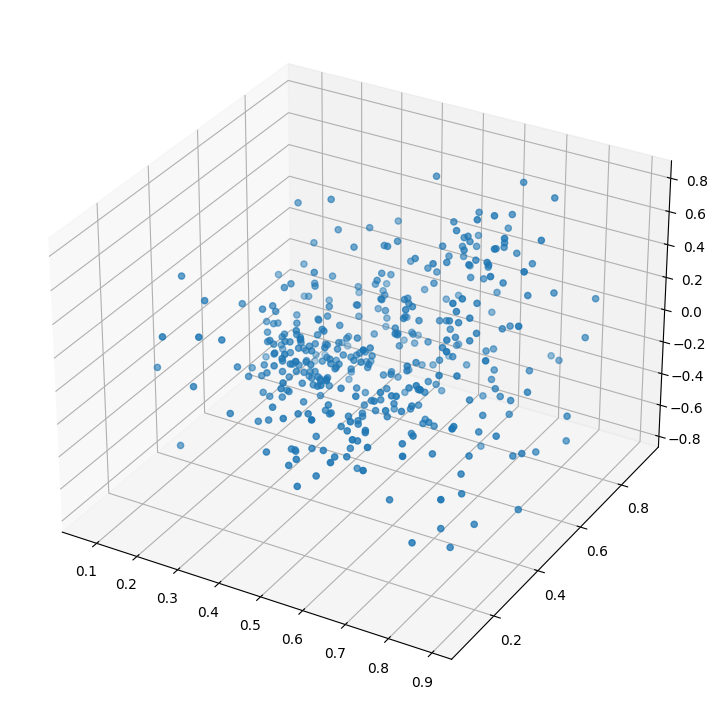

In [6]:
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
#ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(df['x'], df['y'], df['weight'])

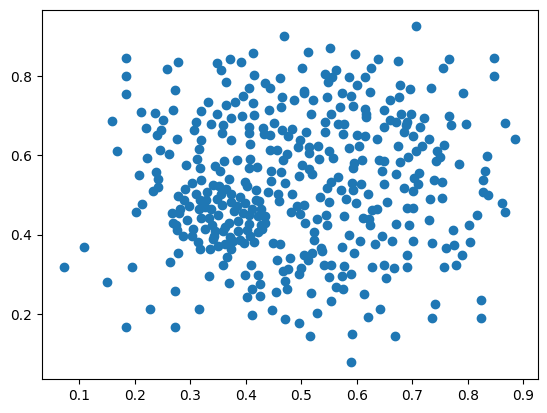

In [7]:
plt.scatter(df['x'], df['y'])

In [11]:
df.to_csv('gene.txt',header=None, index=None)

In [11]:
rangee = 256
l = [[100]*rangee]*rangee
x = df['x']
y = df['y']
z = df['weight']

In [12]:
for i in range(rangee):
    for j in range(rangee):
        value=0
        for k in range(len(x)):
            dist = (i/rangee-df['x'][k])*(i/rangee-df['x'][k]) + (j/rangee-df['y'][k])*(j/rangee-df['y'][k])
            value+=df['weight'][k]/(dist+1)
        l[i][j]=value


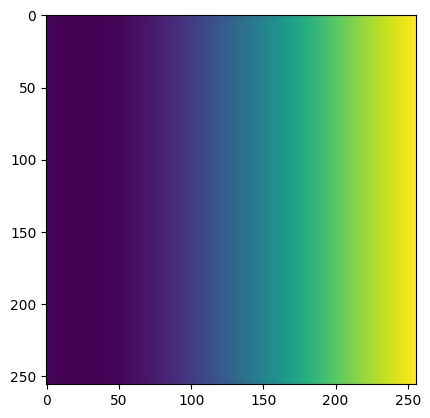

In [13]:
plt.imshow(l)